# Table of Contents
 <p><div class="lev1 toc-item"><a href="#DATA:" data-toc-modified-id="DATA:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DATA:</a></div><div class="lev1 toc-item"><a href="#exploration" data-toc-modified-id="exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>exploration</a></div><div class="lev2 toc-item"><a href="#plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)" data-toc-modified-id="plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-civilian-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-civilian-fire-arms-per-person-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>plot the average number of civilian fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-homicide-by-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-homicide-by-fire-arms-per-person-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>plot the average number of homicide by fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev1 toc-item"><a href="#Modeling" data-toc-modified-id="Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling</a></div><div class="lev2 toc-item"><a href="#fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person." data-toc-modified-id="fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person.-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them" data-toc-modified-id="Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Extra credit: calculate the confidence interval by hand and also plot them</a></div><div class="lev2 toc-item"><a href="#Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot." data-toc-modified-id="Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot.-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Use the stsatsmodels.gaphics package to plot the influence plot.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences" data-toc-modified-id="Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences</a></div><div class="lev2 toc-item"><a href="#Discuss-your-findings" data-toc-modified-id="Discuss-your-findings-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Discuss your findings</a></div>

**regression exercise**

**written by Federica B Bianco CUSP 2017**

**for PUI lecture on models and linear regression**

**investigate linear relationships between fire arm possession, homicides by fire arms, and mass shootings for different countries, considering also the country GDP**

# DATA: 

The Guardian firearms murders and ownership data. The relevans sheet is uploaded in the github repository as a csv file. Download it from there. Note: this dataset is from 2012.

**Extra credit**: download directly from google docs with a google API

https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/edit#gid=0

Number of mass shootings: find the link here https://datawrapper.dwcdn.net/pvLFI/4/

The world population by country find the download link here :
https://data.worldbank.org/indicator/SP.POP.TOTL

Remember that all read or downloads have to me reproducible.

Merge all datasets. After throwing away the irrelevant data it should look something like this (I renamed the GDP and the population as gdp" and "pop")

Throughout, when I ask you to include errors in plots or models, use Poisson statistics: the error is the square root of the number you are considering (e.g. this country has N fire arms +/- square root of N, or this country has Np [= N/population +/- (square root of N) / population] fire arms per person).

In [218]:
import os
import pandas as pd
import numpy as np
import pylab as pl
%pylab inline
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import requests

Populating the interactive namespace from numpy and matplotlib


/Users/cihe/anaconda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['scatter']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [138]:
df_ = pd.read_csv(os.getenv('PUIDATA')+"/World firearms murders and ownership - Sheet 1.csv")
df_.head()

,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
0,Albania,AL,CTS,65.9,56.0,1.76,70.0,8.6,270000.0
1,Algeria,DZ,CTS,4.8,20.0,0.06,78.0,7.6,1900000.0
2,Angola,AO,NaN,NaN,NaN,NaN,34.0,17.3,2800000.0
3,Anguilla,AI,WHO-MDB,24.0,1.0,7.14,NaN,NaN,NaN
4,Argentina,AR,Ministry of Justice,52.0,1198.0,3.02,62.0,10.2,3950000.0


In [139]:
ms = pd.read_csv( os.getenv('PUIDATA') + '/data-pvLFI.csv')
pop = pd.read_csv( os.getenv('PUIDATA') + '/API_SP.POP.TOTL_DS2_en_csv_v2.csv')
gdp = pd.read_csv( os.getenv('PUIDATA') + '/API_NY.GDP.MKTP.CD_DS2_en_csv_v2.csv')

In [140]:
df_.keys()

Index(['Country/Territory', 'ISO code', 'Source', '% of homicides by firearm',
       'Number of homicides by firearm',
       'Homicide by firearm rate per 100,000 pop', 'Rank by rate of ownership',
       'Average firearms per 100 people',
       'Average total all civilian firearms'],
      dtype='object')

In [141]:
df_.drop([u'ISO code', 'Source',u'% of homicides by firearm',
                u'Homicide by firearm rate per 100,000 pop',u'Rank by rate of ownership',
                u'Average firearms per 100 people',],axis=1,inplace=True)

In [142]:
df_.head()

,Country/Territory,Number of homicides by firearm,Average total all civilian firearms
0,Albania,56.0,270000.0
1,Algeria,20.0,1900000.0
2,Angola,NaN,2800000.0
3,Anguilla,1.0,NaN
4,Argentina,1198.0,3950000.0


In [143]:
pop1 = pop[[u'Country Name',u'2012']]
pop1.head()

,Country Name,2012
0,Aruba,102577.0
1,Afghanistan,30696958.0
2,Angola,25096150.0
3,Albania,2900401.0
4,Andorra,82431.0


In [144]:
gdp1 = gdp[[u'Country Name',u'2012']]
gdp1.head()

,Country Name,2012
0,Aruba,NaN
1,Afghanistan,2.053654e+10
2,Angola,1.153980e+11
3,Albania,1.231978e+10
4,Andorra,3.146152e+09


In [145]:
pop1 = pop1.merge(gdp1, right_on="Country Name", left_on="Country Name")
pop1.head()

,Country Name,2012_x,2012_y
0,Aruba,102577.0,NaN
1,Afghanistan,30696958.0,2.053654e+10
2,Angola,25096150.0,1.153980e+11
3,Albania,2900401.0,1.231978e+10
4,Andorra,82431.0,3.146152e+09


In [146]:
pop1.columns = [u'Country Name',u'pop',u'gdp']
pop1.head()

,Country Name,pop,gdp
0,Aruba,102577.0,NaN
1,Afghanistan,30696958.0,2.053654e+10
2,Angola,25096150.0,1.153980e+11
3,Albania,2900401.0,1.231978e+10
4,Andorra,82431.0,3.146152e+09


In [147]:
df_ = df_.merge(pop1, right_on="Country Name", left_on="Country/Territory")
df_.drop(['Country/Territory'],axis=1,inplace=True)
df_.head()

,Number of homicides by firearm,Average total all civilian firearms,Country Name,pop,gdp
0,56.0,270000.0,Albania,2900401.0,1.231978e+10
1,20.0,1900000.0,Algeria,37565847.0,2.090470e+11
2,NaN,2800000.0,Angola,25096150.0,1.153980e+11
3,1198.0,3950000.0,Argentina,42096739.0,5.459820e+11
4,9.0,380000.0,Armenia,2881922.0,1.061932e+10


In [148]:
df_ = df_.merge(ms, right_on="Country", left_on="Country Name")
df_.head()

,Number of homicides by firearm,Average total all civilian firearms,Country Name,pop,gdp,Country,Guns/100 inhabitants,Number of mass shootings
0,30.0,3050000.0,Australia,22728254.0,1.538190e+12,Australia,15.0,4
1,18.0,2500000.0,Austria,8429991.0,4.074520e+11,Austria,30.4,1
2,173.0,9950000.0,Canada,34750545.0,1.824290e+12,Canada,30.8,4
3,15.0,650000.0,Denmark,5591572.0,3.271490e+11,Denmark,12.0,0
4,24.0,2400000.0,Finland,5413971.0,2.567060e+11,Finland,45.3,2


# exploration

## plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)

Use Poisson statistics for the errorbars on the number of mass shootings (optional: include errors on the population, also as Poisson statistics)

Are there any points that look like they may be outilers?


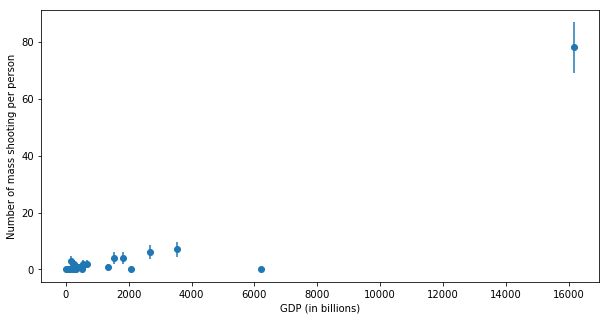

Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of mass shootings


In [149]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdp / 1e9, df_['Number of mass shootings'])
ax.errorbar(df_.gdp / 1e9, df_['Number of mass shootings'], 
            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shooting per person")
ax.set_ylim()
pl.show()
print ("Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest number of mass shootings")


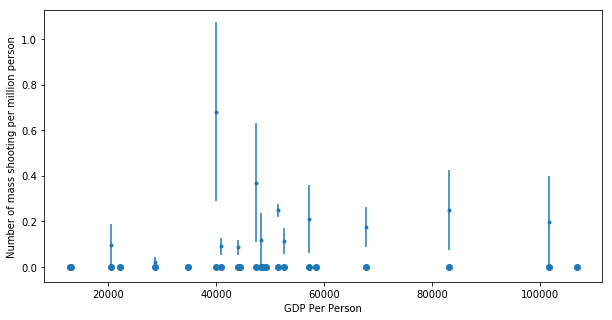

Number of mass shooting vs GDP Per Person, errors represent Poisson statistics.



In [176]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['gdp'] / df_['pop'], df_['Number of mass shootings']/df_['pop'])
ax.errorbar(df_['gdp'] / df_['pop'], df_['Number of mass shootings'] / df_['pop'] * 1e6, 
            yerr = np.sqrt(df_['Number of mass shootings'])/ df_['pop'] * 1e6, fmt = '.')
ax.set_xlabel("GDP Per Person")
ax.set_ylabel("Number of mass shooting per million person")
ax.set_ylim()
pl.show()
print ("Number of mass shooting vs GDP Per Person, " + 
       "errors represent Poisson statistics.\n")

# In first plot, the point at the upper-right corner is a big outlier with both high GDP and higher number of mass shootings. After apply per capita, the point doesn't look like an outlier anymore.The correlations in both graphs are not strong, but could be potential weak positive correlation.

## plot the average number of civilian fire arms per person
first without errors, then with errors. are there  points that look like outliers?

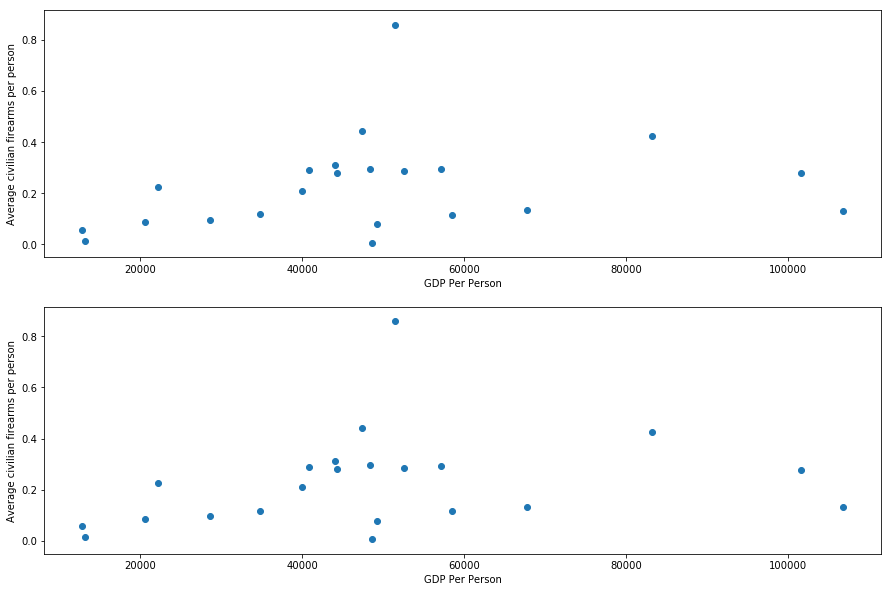

Average total all civilian firearms vs GDP Per Person, errors represent Poisson statistics.
The error bars on second figure are there, but they are too small to show
in this picture scale.


In [179]:
fig = pl.figure(figsize=(15,10)) 

ax1 = fig.add_subplot(211)
# without error
scatter1 = ax1.scatter(df_['gdp'] / df_['pop'], df_['Average total all civilian firearms']/df_['pop'])
ax1.set_xlabel("GDP Per Person")
ax1.set_ylabel("Average civilian firearms per person")
ax1.set_ylim()
# with error
ax2 = fig.add_subplot(212)
scatter2 = ax2.scatter(df_['gdp'] / df_['pop'], df_['Average total all civilian firearms']/df_['pop'])
ax2.errorbar(df_['gdp'] / df_['pop'], df_['Average total all civilian firearms'] / df_['pop'], 
            yerr = np.sqrt(df_['Average total all civilian firearms'])/ df_['pop'], fmt = '.')
ax2.set_xlabel("GDP Per Person")
ax2.set_ylabel("Average civilian firearms per person")
ax2.set_ylim()

pl.show()
print ("Average total all civilian firearms vs GDP Per Person, " + 
       "errors represent Poisson statistics.\nThe error bars on second figure are there, but they are too small to show\nin this picture scale.")

## plot the average number of homicide by fire arms per person
first as a histogram

then against the country GDP, with statistical errors. are there  points that look like outliers?

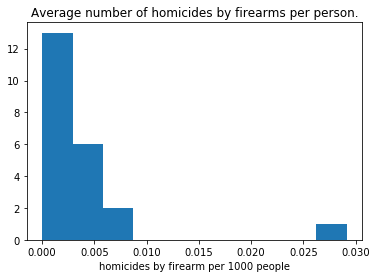

In [188]:
fig, ax = plt.subplots()
ax.hist(df_['Number of homicides by firearm'] / df_['pop'] * 1000)
ax.set_xlabel('homicides by firearm per 1000 people');
ax.set_title('Average number of homicides by firearms per person.')
pl.show()

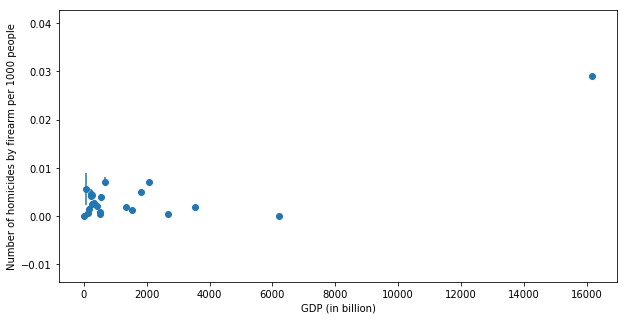

In [190]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
scatter = ax.scatter(df_['gdp'] / 1e9, df_['Number of homicides by firearm'] / df_['pop'] * 1000)
ax.errorbar(df_['gdp'] / 1e9, df_['Number of homicides by firearm'] / df_['pop'] * 1000, 
            yerr = np.sqrt(df_['Number of homicides by firearm']) / df_['pop'] * 1000, fmt = '.')
ax.set_xlabel("GDP (in billion)")
ax.set_ylabel("Number of homicides by firearm per 1000 people")

pl.show()

**Average number of homicides per 1000 people against gdp.
The outlier is the upper-right point.But no sign of obvious correlation.

## plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color
with and without errorbars


In [192]:
df_

,Number of homicides by firearm,Average total all civilian firearms,Country Name,pop,gdp,Country,Guns/100 inhabitants,Number of mass shootings
0,30.0,3050000.0,Australia,22728254.0,1.538190e+12,Australia,15.0,4
1,18.0,2500000.0,Austria,8429991.0,4.074520e+11,Austria,30.4,1
2,173.0,9950000.0,Canada,34750545.0,1.824290e+12,Canada,30.8,4
3,15.0,650000.0,Denmark,5591572.0,3.271490e+11,Denmark,12.0,0
4,24.0,2400000.0,Finland,5413971.0,2.567060e+11,Finland,45.3,2
5,35.0,19000000.0,France,65659790.0,2.681420e+12,France,31.2,6
6,158.0,25000000.0,Germany,80425823.0,3.543980e+12,Germany,30.3,7
7,29.0,2500000.0,Greece,11045011.0,2.456710e+11,Greece,22.5,0
8,7.0,560000.0,Hungary,9920362.0,1.273210e+11,Hungary,5.5,0
9,0.0,90000.0,Iceland,320716.0,1.421858e+10,Iceland,30.3,0


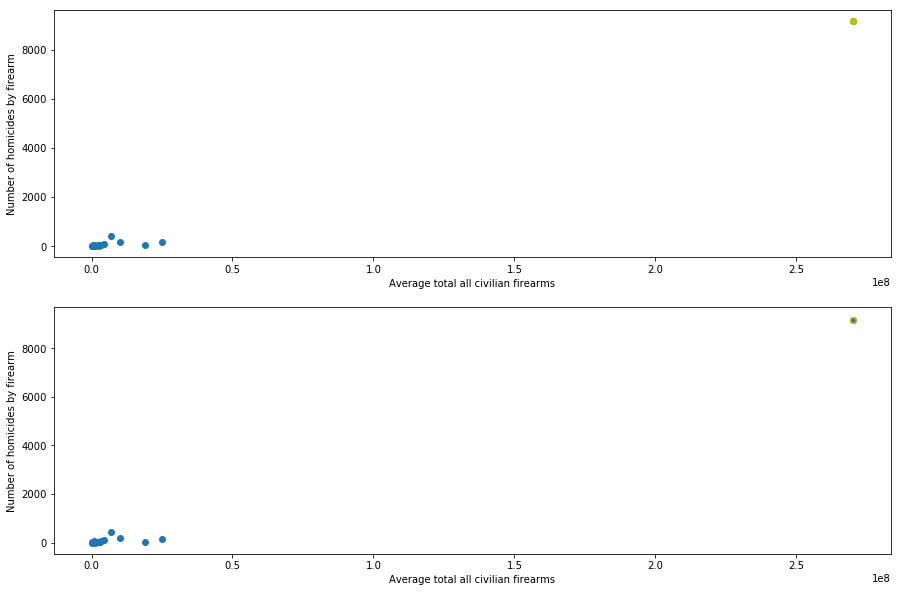

number of homicides by fire arm against the number of civilian firearms, errors represent Poisson statistics.


In [196]:
fig = pl.figure(figsize=(15,10)) 

ax1 = fig.add_subplot(211)

scatter1 = ax1.scatter(df_['Average total all civilian firearms'], df_['Number of homicides by firearm'])
usa = ax1.plot(df_['Average total all civilian firearms'][21], df_['Number of homicides by firearm'][21], 'yo')
ax1.set_xlabel("Average total all civilian firearms")
ax1.set_ylabel("Number of homicides by firearm")
ax1.set_ylim()

ax2 = fig.add_subplot(212)
scatter2 = ax2.scatter(df_['Average total all civilian firearms'], df_['Number of homicides by firearm'])
ax2.errorbar(df_['Average total all civilian firearms'], df_['Number of homicides by firearm'], 
            yerr = np.sqrt(df_['Number of homicides by firearm']), fmt = '.')
usa = ax2.plot(df_['Average total all civilian firearms'][21], df_['Number of homicides by firearm'][21], 'yo')
ax2.set_xlabel("Average total all civilian firearms")
ax2.set_ylabel("Number of homicides by firearm")
ax2.set_ylim()

pl.show()
print ("number of homicides by fire arm against the number of civilian firearms, " + 
       "errors represent Poisson statistics.")

# The US is in yellow color and is the outlier . The errorbars are too small to observe, you can see the yellow dot has some black stain on it, that is it!! Still no obvious potential correlations.

## plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color
with and without errorbars


In [ ]:
#df_['shootingspp'] = df_["Number of mass shootings"] / df_['pop'] * 1e3

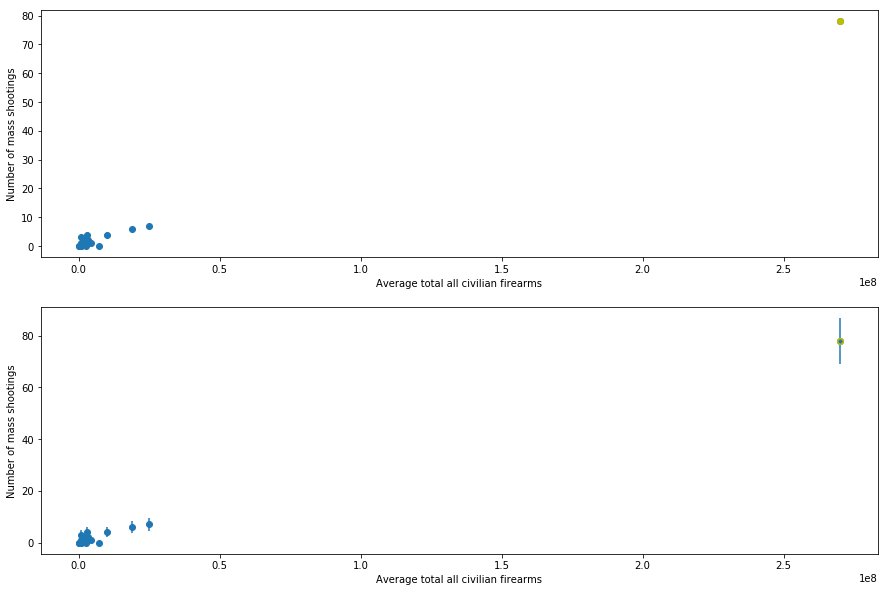

the number of mass shootings against the number of civilian firearms, errors represent Poisson statistics.The US is outlier again, with a long errorbar.
There could potentially be a positive correlation between mass shooting and the amount of civilian firearms.


In [198]:
fig = pl.figure(figsize=(15,10)) 
# without error
ax1 = fig.add_subplot(211)

scatter1 = ax1.scatter(df_['Average total all civilian firearms'], df_['Number of mass shootings'])
usa = ax1.plot(df_['Average total all civilian firearms'][21], df_['Number of mass shootings'][21], 'yo')
ax1.set_xlabel('Average total all civilian firearms')
ax1.set_ylabel('Number of mass shootings')
ax1.set_ylim()
# with error
ax2 = fig.add_subplot(212)
scatter2 = ax2.scatter(df_['Average total all civilian firearms'], df_['Number of mass shootings'])
ax2.errorbar(df_['Average total all civilian firearms'], df_['Number of mass shootings'], 
            yerr = np.sqrt(df_['Number of mass shootings']), fmt = '.')
usa = ax2.plot(df_['Average total all civilian firearms'][21], df_['Number of mass shootings'][21], 'yo')
ax2.set_xlabel('Average total all civilian firearms')
ax2.set_ylabel('Number of mass shootings')
ax2.set_ylim()

pl.show()
print ("the number of mass shootings against the number of civilian firearms, " + 
       "errors represent Poisson statistics.The US is outlier again, with a long errorbar."+ 
       "\nAgain, this is a potentially positive correlation between mass shooting and the amount of civilian firearms.")

# Modeling

## fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person. 
Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity). (You can simply divide by the order of magnitude of the mean of the sample to obtain this). Use

    - statsmodels OLS
    - statsmodels WLS
    - seaborn
    - choose one of
        -- creating a function that calculates the residuals and minimizing that function
        -- analytical solution http://mathworld.wolfram.com/LeastSquaresFitting.html
        -- numpy.polyfit() - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html
    

WLS: that is the weighted square fit. The statsmodel package WLS function allows you to take the uncertainties of each data point into account when you fit your model. It takes the parameter weights, which is the inverse of your errors:
weights = 1.0/df.yerror
Notice that 
    a - sqrt(0) = 0
    b - 1/0 = infinity
    c - you cannot have weight that are infinity in your fit. Please come up with a solution and justify it.


the latter three you can learn about in this example: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/genderIncomeBias.ipynb
Since we did not discuss these, I will add some notes to the repo in the afternoon.

Use the seaborn python package built in regression function  to plot the regression confidence intervals. 

import seaborn  as sns
sns.regplot(x="x", y="y", data=df);




In [200]:
#CivFirearmsPP is the Average total all civilian firearms per 1000 person
#NumMassShootPP is the Number of mass shootings per 1000 person
df_['CivFirearmsPP'] = df_['Average total all civilian firearms'] / df_['pop'] * 1000
df_['NumMassShootPP'] = df_['Number of mass shootings'] / df_['pop'] * 1000
df_['CivFirearmsPP'].mean()

228.95008572891786

In [201]:
df_['NumMassShootPP'].mean()

0.00012102125439686045

# Large difference, need to do some scaling.

In [202]:
df_['CivFirearmsPP'] = df_['Average total all civilian firearms'] / df_['pop'] 
df_['NumMassShootPP'] = df_['Number of mass shootings'] / df_['pop'] * 1e6
df_['CivFirearmsPP'].mean()

0.22895008572891778

In [203]:
df_['NumMassShootPP'].mean()

0.12102125439686046

In [204]:
lm1 = smf.ols(formula="NumMassShootPP ~ CivFirearmsPP", data=df_).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         NumMassShootPP   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     4.971
Date:                Tue, 17 Oct 2017   Prob (F-statistic):             0.0374
Time:                        22:26:56   Log-Likelihood:                 11.424
No. Observations:                  22   AIC:                            -18.85
Df Residuals:                      20   BIC:                            -16.67
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0315      0.051      0.612      0.548      -0.076       0.139
CivFirearmsPP     0.3911      0.175      2.230      0.037       0.025       0.757
==============================================================================
Omnibus:                       34.840   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.018
Skew:                           2.733   Prob(JB):                     7.71e-20
Kurtosis:                      11.133   Cond. No.                         5.74
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Interpret: The coefficient of firearms per person is significant, which is 0.3911. So each increase of 10 firearms per person is predicting roughly 3 to 4 mass shootings per million people in average.

In [205]:
yerr = np.sqrt(df_['Number of mass shootings']) / df_['pop'] * 1e6
w = np.zeros(len(yerr))
for i in range(len(yerr)):
    if yerr[i] == 0:
        w[i] = 1
    else:
        w[i] = 1.0 / yerr[i]

print(w)

[ 11.364127     8.429991    17.3752725    1.           3.82825561
  26.80549702  30.39810381   1.           1.           1.           1.           1.
   1.           1.           2.54501772   5.018573     1.          10.514844
  46.773055     6.73121391   5.65463464  35.55331533]


In [206]:
lm2 = smf.wls(formula="NumMassShootPP ~ CivFirearmsPP",weights=w ** 2,data=df_).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:         NumMassShootPP   R-squared:                       0.829
Model:                            WLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     96.83
Date:                Tue, 17 Oct 2017   Prob (F-statistic):           4.14e-09
Time:                        22:30:24   Log-Likelihood:                 11.244
No. Observations:                  22   AIC:                            -18.49
Df Residuals:                      20   BIC:                            -16.31
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0101      0.013      0.794      0.436      -0.016       0.037
CivFirearmsPP     0.2825      0.029      9.840      0.000       0.223       0.342
==============================================================================
Omnibus:                        3.929   Durbin-Watson:                   1.613
Prob(Omnibus):                  0.140   Jarque-Bera (JB):                2.524
Skew:                           0.822   Prob(JB):                        0.283
Kurtosis:                       3.222   Cond. No.                         3.88
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Interpret: The coefficient of firearms per person is significant, which is 0.2825. So each increase of 10 firearms per person is predicting roughly 2 to 3 mass shootings per million people in average.
The adjusted R^2 also rise from 0.199 to 0.829, meaning that this could be a better model in predicting their relationship.

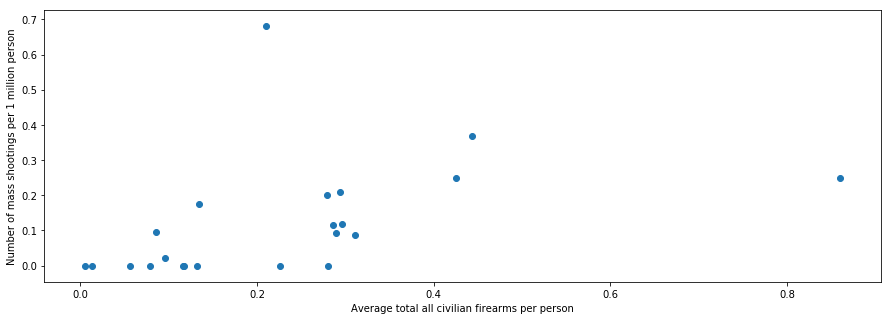

In [207]:
fig = pl.figure(figsize=(15,5))
ax = fig.add_subplot(111)

ax.scatter(df_['CivFirearmsPP'], df_['NumMassShootPP'])
ax.set_ylabel("Number of mass shootings per 1 million person")
ax.set_xlabel("Average total all civilian firearms per person")

pl.show()

**Number of mass shootings per person against Average total all civilian firearms per 1 million person

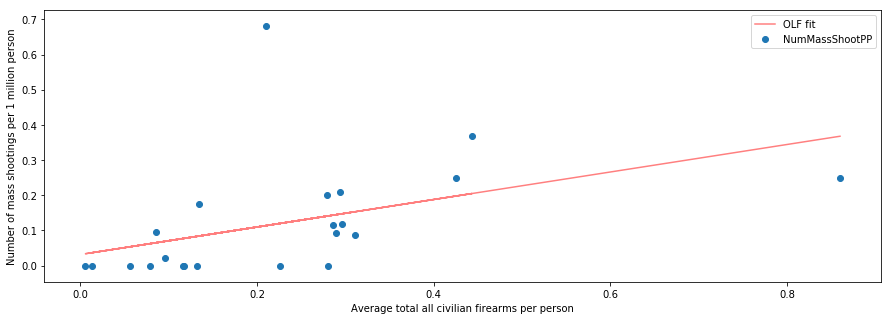

In [214]:
fig = pl.figure(figsize=(15,5))
ax = fig.add_subplot(111)

ax.scatter(df_['CivFirearmsPP'], df_['NumMassShootPP'])
ax.plot(df_['CivFirearmsPP'], lm1.predict(), 'r-', alpha=0.5, label='OLF fit')
ax.set_ylabel("Number of mass shootings per 1 million person")
ax.set_xlabel("Average total all civilian firearms per person")
pl.legend()
pl.show()

**Use statsmodels OLS to fit the line

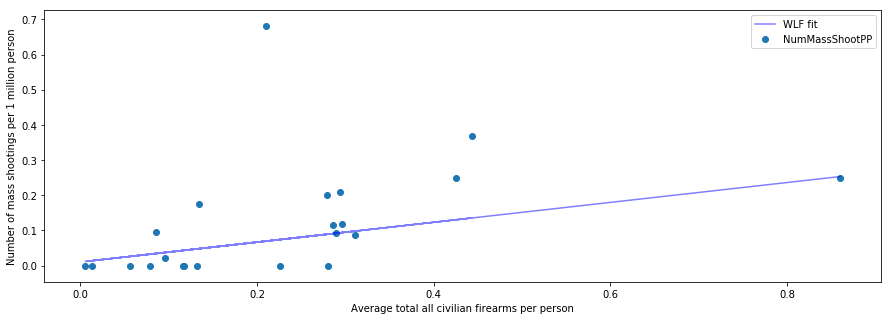

In [215]:
fig = pl.figure(figsize=(15,5))
ax = fig.add_subplot(111)

ax.scatter(df_['CivFirearmsPP'], df_['NumMassShootPP'])
ax.plot(df_['CivFirearmsPP'], lm2.predict(), 'b', alpha=0.5, label='WLF fit')
ax.set_ylabel("Number of mass shootings per 1 million person")
ax.set_xlabel("Average total all civilian firearms per person")
pl.legend()
pl.show()

**Use statsmodels WLS to fit the line

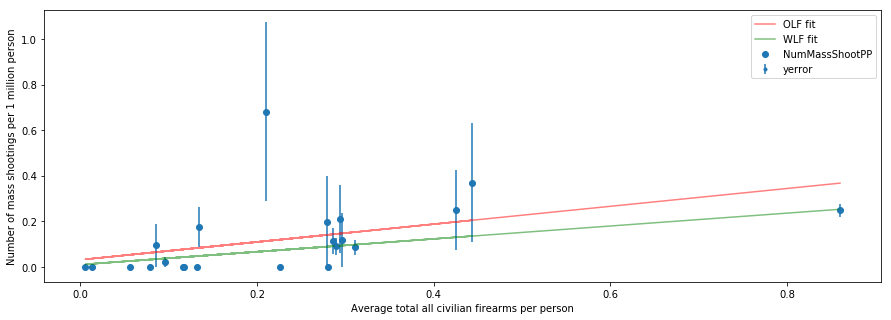

In [216]:
fig = pl.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.scatter(df_['CivFirearmsPP'], df_['NumMassShootPP'])
ax.plot(df_['CivFirearmsPP'], lm1.predict(), 'r', alpha=0.5, label='OLF fit')
ax.plot(df_['CivFirearmsPP'], lm2.predict(), 'g', alpha=0.5, label='WLF fit')
ax.set_ylabel("Number of mass shootings per 1 million person")
ax.set_xlabel("Average total all civilian firearms per person")
ax.errorbar(df_['CivFirearmsPP'], df_['NumMassShootPP'], yerr = np.sqrt(df_['Number of mass shootings']) / df_['pop'] * 1e6, fmt = '.', label='yerror')

ax.legend()
pl.show()

**Use statsmodels OLS and WLS to fit the line and show the error bar

/Users/cihe/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


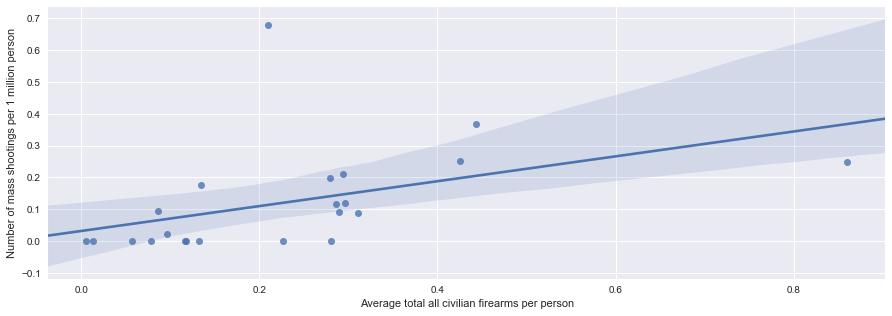

In [219]:
fig = pl.figure(figsize=(15,5))
ax = fig.add_subplot(111)
sns.regplot(x="CivFirearmsPP", y="NumMassShootPP", data=df_)
ax.set_ylabel("Number of mass shootings per 1 million person")
ax.set_xlabel("Average total all civilian firearms per person")
ax.legend()
pl.show()

**Use seaborn to plot

## Extra credit: calculate the confidence interval by hand and also plot them 
you can use pylab.fill_between(x, yfit - ci, yfit + ci, alpha=0.5)

**Confidence intervals: **
there are three type of intervals in a linear regression, plot any one of them all three if you want - how do they compare to the seaborn plot?:

1) Confidence intervals for the parameters slope and intercept

2) Confidence interval for the average y value

3) Prediction interval for a single y value

1) __confidence interval of the  model parameters slope and intercept:__
define sigma as the sum of the residuals over the square root of number n of observations. 

sigma: σ̂ =sqrt(Sum((Yoberved_i−Ypredicted_i)^2)/n)

where the sum is over all observations

Define t_alpha/2,n-2 the t statistics at (1-alpha/2) for a t distribution with n-2 degrees of freedom (you can calculate it with scipy
tp = sp.stats.t.ppf(0.975, n-2)



In [ ]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression.png")

In [ ]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression2.png")

[proof](https://onlinecourses.science.psu.edu/stat414/node/280)

2) **A confidence interval for E(y | x) , the expected (average) value of y for a given x_**

define s: residual standard error sy = sqrt(Sum((y_observed-y_predicted)^2)/(n-2))

(note: n-2 is the degrees of freedom of the problem: observations - number of parameters - 1)

the confidence interval for a given y(x*) is: 

y_predicted(x*) +/- t_(alpha/2)(n-2) * sy * sqrt( 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

In [ ]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciY.png")

3) **Confidence intervals for average y (predicted) values**

y_predicted(x*) +/- t_(n-2) * sy * sqrt( 1 + 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

very similar, but note the +1 in the square root

In [ ]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciYaverage.png")

In [ ]:
pl.figure()
import seaborn  as sns
sns.regplot(x="x", y="y", data=df_);

pl.ylabel("Mass shootings")
pl.xlabel("Fire arms");

## Use the stsatsmodels.gaphics package to plot the influence plot. 
Read the package documentation to learn how to read this plot and extract the countries with the highest influence

This is the topic of this week's assigned reading, so make sure you do the reading before you do this step. It will help you interpret the plot.

In [ ]:
sm.graphics.influence_plot(modelOLS, alpha  = 0.05, criterion="cooks");

## Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences

## Discuss your findings